In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Most Common class
def most_common(lst):
    end_class=[]
    e= max(set(lst), key=lst.count)
    return e

def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))






#Creating Dedicated class for Classifier
class KNeighborsClassifier:
    
    #constructor
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    
    #feeding Training data to Knn.

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    #Prediction funtion
    def predict(self, X_test):
        neighbors = []
        
        for x in X_test:
            
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        
        return list(map(most_common, neighbors))


    def predict1(self, X_test):
      neighbors = []
        
      for x in X_test:

        distances = self.dist_metric(x, self.X_train)
        y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
        neighbors.append(y_sorted[:self.k])
        
      return list(map(most_common, neighbors))    
       
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        
        accuracy = sum(y_pred == y_test) / len(y_test)
       
        return accuracy







# Unpack the iris dataset, from UCI Machine Learning Repository

In [2]:
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()

X = iris['data']
y = iris['target']


df1=pd.DataFrame(X,y)
df1.index.names = ['Target']
display(df1)


# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)

,0,1,2,3
Target,,,,
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2
...,...,...,...,...
2,6.7,3.0,5.2,2.3
2,6.3,2.5,5.0,1.9
2,6.5,3.0,5.2,2.0


# Comparing **Knn's output** to **expected output**

In [3]:
#data frame
e=[]
knn = KNeighborsClassifier(k=25)
knn.fit(X_train, y_train)

e=knn.predict1(X_test)
df=pd.DataFrame(e,y_test,columns=['Expected Output'])
df.index.names = ['kNN Output']
print(df)

            Expected Output
kNN Output                 
2                         1
0                         0
1                         1
0                         0
0                         0
0                         0
0                         0
1                         1
2                         2
0                         0
0                         0
2                         2
1                         1
0                         0
2                         2
1                         1
1                         1
2                         2
0                         0
1                         1
2                         1
1                         1
0                         0
1                         1
0                         0
2                         2
1                         1
1                         1
1                         1
1                         1


In [4]:
# Test knn model across varying ks
accuracies = []
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    
    accuracies.append(accuracy)


# **Visualising the accuracy accoring to Value of K**

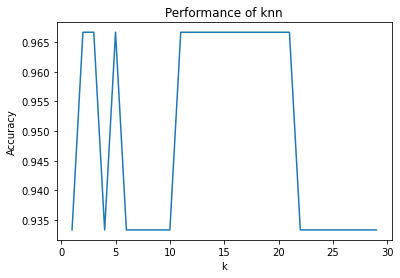

In [5]:

# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()